In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import fiona
import pyproj
import numpy as np
from shapely.geometry import Polygon, MultiPolygon
from matplotlib.colors import ListedColormap

<AxesSubplot:>

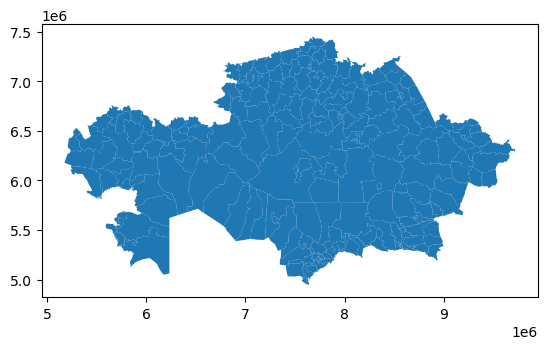

In [2]:
shapefile_path = 'geoBoundaries-KAZ-ADM0-all//geoBoundaries-KAZ-ADM0_simplified.shp'
shapefile_path = 'kaz_adm_unhcr_2023_shp//kaz_admbnda_adm2_unhcr_2023.shp'

gdf = gpd.read_file(shapefile_path, crs='ESRI:102100')
gdf.plot()

In [3]:
gdf

,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,geometry
0,KAZ,Kazakhstan,Mangystau Region,KAZ014,Beyneu District,KAZ014002,"POLYGON ((6193857.398 5546479.677, 6191672.410..."
1,KAZ,Kazakhstan,Akmola Region,KAZ002,Arshaly District,KAZ002002,"POLYGON ((7973376.148 6629750.498, 7973518.092..."
2,KAZ,Kazakhstan,Ulytau Region,KAZ019,Ulytau District,KAZ019004,"POLYGON ((7007571.886 5973268.455, 7013048.694..."
3,KAZ,Kazakhstan,Turkistan Region,KAZ018,Sayram District,KAZ018010,"MULTIPOLYGON (((7727716.674 5237038.799, 77277..."
4,KAZ,Kazakhstan,West Kazakhstan Region,KAZ020,Zelenov District,KAZ020011,"POLYGON ((5594209.782 6671783.775, 5595743.420..."
...,...,...,...,...,...,...,...
213,KAZ,Kazakhstan,West Kazakhstan Region,KAZ020,Zhanakala District,KAZ020012,"POLYGON ((5534635.925 6117615.754, 5521699.316..."
214,KAZ,Kazakhstan,Almaty,KAZ004,Alatau District,KAZ004001,"POLYGON ((8542465.976 5359957.633, 8542835.100..."
215,KAZ,Kazakhstan,Kyzylorda Region,KAZ013,Zhalagash District,KAZ013008,"POLYGON ((7051986.927 5411512.228, 7055856.571..."
216,KAZ,Kazakhstan,Aktobe Region,KAZ003,Ayteke Bi District,KAZ003003,"POLYGON ((6853078.872 6354925.576, 6843108.304..."


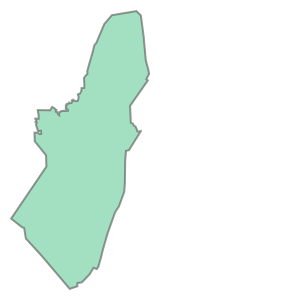

In [4]:
gdf.iloc[5]["geometry"]

In [5]:
target_crs = 'EPSG:4326' 

transformer = pyproj.Transformer.from_crs(gdf.crs, target_crs, always_xy=True)

def reproject_geometry(geom):
    if isinstance(geom, Polygon):
        transformed_coords = [transformer.transform(x, y) for x, y in geom.exterior.coords]
        return Polygon(transformed_coords)
    elif isinstance(geom, MultiPolygon):
        reprojected_parts = [Polygon([transformer.transform(x, y) for x, y in part.exterior.coords]) for part in geom.geoms]
        return MultiPolygon(reprojected_parts)
    else:
        raise ValueError("Unsupported geometry type")

gdf['geometry'] = gdf['geometry'].apply(reproject_geometry)

gdf.crs = target_crs

C:\ProgramData\anaconda3\lib\site-packages\geopandas\geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)


<AxesSubplot:>

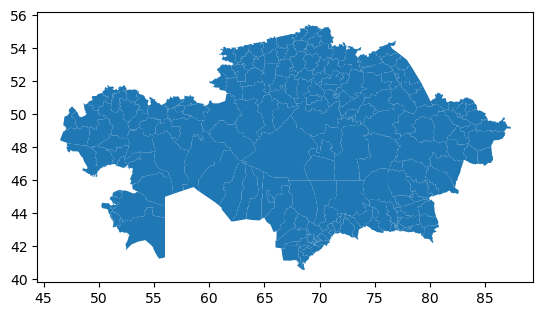

In [6]:
gdf.plot()

# AgroClimatic Zones

In [7]:
shapefile_path = 'c1976_2000_0//c1976_2000.shp'
world_climate_zones_gdf = gpd.read_file(shapefile_path)
world_climate_zones_gdf

,ID,GRIDCODE,geometry
0,1,62,"POLYGON ((-37.50000 83.50000, -38.00000 83.500..."
1,2,62,"POLYGON ((-29.50000 83.50000, -37.00000 83.500..."
2,3,62,"POLYGON ((-46.00000 83.00000, -46.00000 83.500..."
3,4,62,"POLYGON ((-42.50000 83.50000, -39.50000 83.500..."
4,5,61,"POLYGON ((55.50000 81.00000, 55.50000 81.50000..."
...,...,...,...
2254,2255,61,"POLYGON ((-59.50000 -73.00000, -59.00000 -73.0..."
2255,2256,61,"POLYGON ((168.50000 -76.50000, 168.00000 -76.5..."
2256,2257,61,"POLYGON ((-66.00000 -77.00000, -66.50000 -77.0..."
2257,2258,61,"POLYGON ((-159.00000 -80.00000, -164.00000 -80..."


<AxesSubplot:>

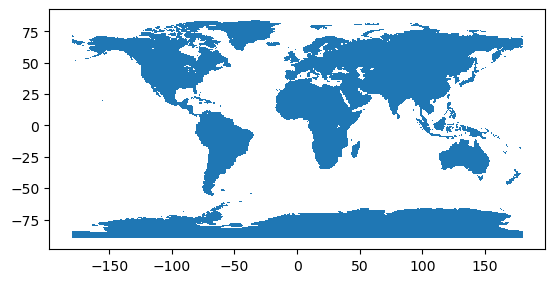

In [8]:
world_climate_zones_gdf.plot()

C:\ProgramData\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_8288\3787487981.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: GEOGCS["GCS_Bessel_1841",DATUM["D_Bessel_1841",SPH ...

  intersections = gpd.sjoin(gdf, world_climate_zones_gdf, how='inner', op='intersects')
C:\ProgramData\anaconda3\lib\site-packages\geopandas\plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


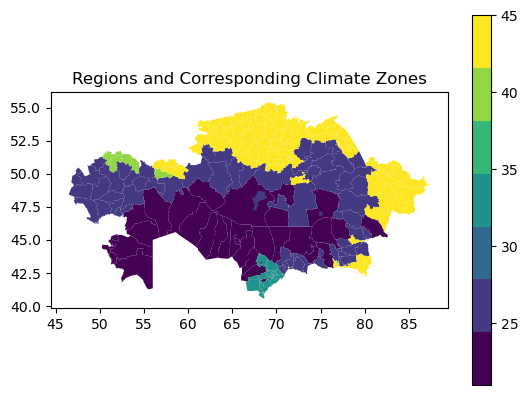

In [9]:
intersections = gpd.sjoin(gdf, world_climate_zones_gdf, how='inner', op='intersects')
intersections = intersections.drop_duplicates(subset=['ADM2_PCODE'], keep='first')

unique_values = intersections['GRIDCODE'].unique()

num_unique_values = len(unique_values)
colors = plt.cm.get_cmap('viridis', num_unique_values)
custom_colormap = ListedColormap([colors(i) for i in range(num_unique_values)])

intersections.plot(column='GRIDCODE', cmap=custom_colormap, legend=True)

plt.title('Regions and Corresponding Climate Zones')

plt.show()

In [10]:
intersections

,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,geometry,index_right,ID,GRIDCODE
0,KAZ,Kazakhstan,Mangystau Region,KAZ014,Beyneu District,KAZ014002,"POLYGON ((55.64037 44.52135, 55.62074 44.52833...",927,928,21
2,KAZ,Kazakhstan,Ulytau Region,KAZ019,Ulytau District,KAZ019004,"POLYGON ((62.95009 47.19077, 62.99929 47.21979...",927,928,21
5,KAZ,Kazakhstan,Kyzylorda Region,KAZ013,Kazaly District,KAZ013004,"POLYGON ((61.56225 43.88312, 61.42545 43.99948...",927,928,21
12,KAZ,Kazakhstan,Mangystau Region,KAZ014,Aktau,KAZ014001,"MULTIPOLYGON (((51.39847 43.49396, 51.39019 43...",927,928,21
47,KAZ,Kazakhstan,Kyzylorda Region,KAZ013,Karmakshy District,KAZ013003,"POLYGON ((61.92799 43.57204, 62.03313 43.59890...",927,928,21
...,...,...,...,...,...,...,...,...,...,...
106,KAZ,Kazakhstan,Jetisu Region,KAZ010,Panfilov District,KAZ010007,"POLYGON ((78.85479 44.39684, 78.89781 44.39877...",627,628,26
40,KAZ,Kazakhstan,Jetisu Region,KAZ010,Taldykorgan,KAZ010009,"POLYGON ((78.11458 45.03905, 78.13524 45.07546...",606,607,42
160,KAZ,Kazakhstan,Jetisu Region,KAZ010,Tekeli,KAZ010010,"POLYGON ((78.68989 44.88205, 78.69028 44.88329...",606,607,42
167,KAZ,Kazakhstan,Jetisu Region,KAZ010,Eskeldi District,KAZ010003,"MULTIPOLYGON (((78.05650 45.00954, 78.07820 45...",606,607,42


In [11]:
gdf.merge(intersections[["ADM2_EN", "GRIDCODE"]], on='ADM2_EN')

,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,geometry,GRIDCODE
0,KAZ,Kazakhstan,Mangystau Region,KAZ014,Beyneu District,KAZ014002,"POLYGON ((55.64037 44.52135, 55.62074 44.52833...",21
1,KAZ,Kazakhstan,Akmola Region,KAZ002,Arshaly District,KAZ002002,"POLYGON ((71.62606 51.04778, 71.62733 51.05466...",42
2,KAZ,Kazakhstan,Ulytau Region,KAZ019,Ulytau District,KAZ019004,"POLYGON ((62.95009 47.19077, 62.99929 47.21979...",21
3,KAZ,Kazakhstan,Turkistan Region,KAZ018,Sayram District,KAZ018010,"MULTIPOLYGON (((69.41926 42.50573, 69.41946 42...",34
4,KAZ,Kazakhstan,West Kazakhstan Region,KAZ020,Zelenov District,KAZ020011,"POLYGON ((50.25364 51.28456, 50.26742 51.29049...",41
...,...,...,...,...,...,...,...,...
225,KAZ,Kazakhstan,West Kazakhstan Region,KAZ020,Zhanakala District,KAZ020012,"POLYGON ((49.71848 48.06464, 49.60227 48.06483...",26
226,KAZ,Kazakhstan,Almaty,KAZ004,Alatau District,KAZ004001,"POLYGON ((76.73828 43.31445, 76.74159 43.31542...",41
227,KAZ,Kazakhstan,Kyzylorda Region,KAZ013,Zhalagash District,KAZ013008,"POLYGON ((63.34908 43.65048, 63.38384 43.88911...",21
228,KAZ,Kazakhstan,Aktobe Region,KAZ003,Ayteke Bi District,KAZ003003,"POLYGON ((61.56225 49.46962, 61.47269 49.48504...",26


In [12]:
gdf

,ADM0_EN,ADM0_PCODE,ADM1_EN,ADM1_PCODE,ADM2_EN,ADM2_PCODE,geometry
0,KAZ,Kazakhstan,Mangystau Region,KAZ014,Beyneu District,KAZ014002,"POLYGON ((55.64037 44.52135, 55.62074 44.52833..."
1,KAZ,Kazakhstan,Akmola Region,KAZ002,Arshaly District,KAZ002002,"POLYGON ((71.62606 51.04778, 71.62733 51.05466..."
2,KAZ,Kazakhstan,Ulytau Region,KAZ019,Ulytau District,KAZ019004,"POLYGON ((62.95009 47.19077, 62.99929 47.21979..."
3,KAZ,Kazakhstan,Turkistan Region,KAZ018,Sayram District,KAZ018010,"MULTIPOLYGON (((69.41926 42.50573, 69.41946 42..."
4,KAZ,Kazakhstan,West Kazakhstan Region,KAZ020,Zelenov District,KAZ020011,"POLYGON ((50.25364 51.28456, 50.26742 51.29049..."
...,...,...,...,...,...,...,...
213,KAZ,Kazakhstan,West Kazakhstan Region,KAZ020,Zhanakala District,KAZ020012,"POLYGON ((49.71848 48.06464, 49.60227 48.06483..."
214,KAZ,Kazakhstan,Almaty,KAZ004,Alatau District,KAZ004001,"POLYGON ((76.73828 43.31445, 76.74159 43.31542..."
215,KAZ,Kazakhstan,Kyzylorda Region,KAZ013,Zhalagash District,KAZ013008,"POLYGON ((63.34908 43.65048, 63.38384 43.88911..."
216,KAZ,Kazakhstan,Aktobe Region,KAZ003,Ayteke Bi District,KAZ003003,"POLYGON ((61.56225 49.46962, 61.47269 49.48504..."
